<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 10  ocean_proximity_INLAND      20433 non-null  bool   
 11  ocean_proximity_ISLAND      20433 non-null  bool   
 12  ocean_proximity_NEAR BAY    20433 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  20433 no

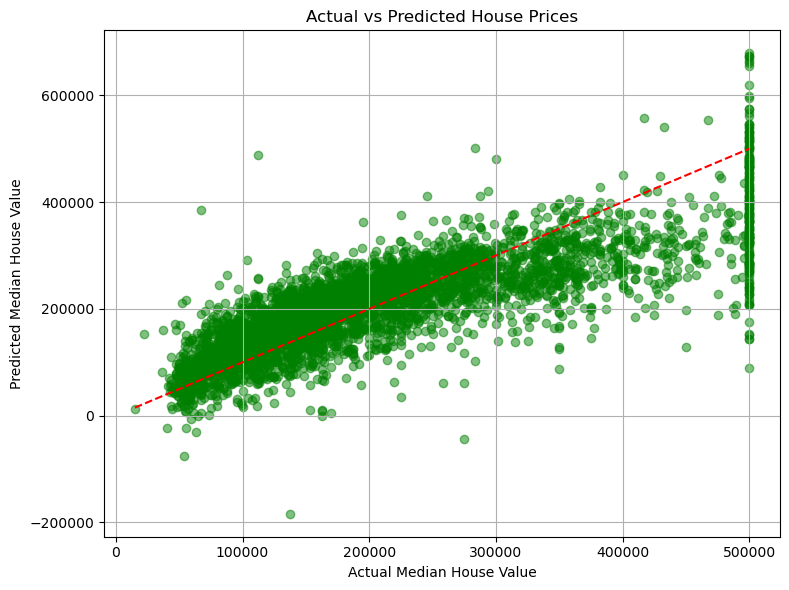

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("housing.csv")

data.dropna(inplace=True)

data = pd.get_dummies(data)

data.info()
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train).reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = pd.DataFrame(X_test).reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

X_train_b = X_train_b.astype(np.float64)
X_test_b = X_test_b.astype(np.float64)
y_train = Y_train.values.reshape(-1, 1).astype(np.float64)
y_test = Y_test.values.reshape(-1, 1).astype(np.float64)

theta_best = np.linalg.pinv(X_train_b).dot(y_train)

y_pred_test = X_test_b.dot(theta_best)

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("✅ Mean Squared Error (MSE):", mse)
print("🎯 R² Score (Accuracy): {:.2f}%".format(r2 * 100))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
